<h2>Setting up imports...</h2>

In [0]:
%tensorflow_version 2.x
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
print(tf.__version__)
print(keras.__version__)
print(np.__version__)

2.2.0-rc2
2.3.0-tf
1.18.2


<h2>...Importing hw_3problem_1.py code...</h2>

data.shape is (5000, 2)
labels.shape is (5000, 1)


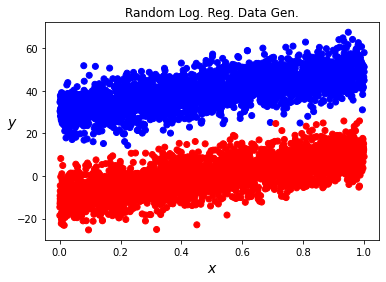

In [0]:
def get_random_data(w, b, mu, sigma, m):
    data, labels = np.zeros((m, 2)), np.zeros((m, 1), dtype=int)
    for i in range(m):
        c = random.randrange(0, 2)
        x_1 = random.random()
        n = np.random.default_rng().normal(mu, sigma, 1)
        x_2 = w * x_1 + b + (-1)**c * n
        data[i, 0], data[i, 1] = x_1, x_2
        labels[i] = c
    return (data, labels)

def display_random_data(labels, data):
    datax, datay = np.split(data,[-1], axis = 1)
    pltclrs = ["red" if val == 1 else "blue" for val in labels]
    plt.scatter(datax, datay, c = pltclrs)
    plt.title("Random Log. Reg. Data Gen.")
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", rotation=0, fontsize=14)
    plt.show()

w, b, mu, sigma, m = 20, 10, 20, 6, 5000
data, labels = get_random_data(w, b, mu, sigma, m)
print("data.shape is", data.shape)
print("labels.shape is", labels.shape)
display_random_data(labels, data)

traindata, testdata = np.split(data, [int(0.8 * data.shape[0])])
trainlbl, testlbl = np.split(labels, [int(0.8 * labels.shape[0])])

def get_train_set():
    return (traindata, trainlbl)
def get_test_set():
    return (testdata, testlbl)
def get_w_and_b():
    return (w, b)

<h2>...Enabling Keras functionality...</h2>

In the code, rdata & rlabel represent the training data and training labels, respectively. 
tdata & tlabel represent the testing data and testing labels, respectively.

In [0]:
rdata, rlabel = get_train_set()
rdatax, rdatay = rdata[:, 0], rdata[:, 1]
tdata, tlabel = get_test_set()
tdatax, tdatay = tdata[:, 0], tdata[:, 1]

network = models.Sequential()
network.add(layers.Dense(1, activation = "sigmoid", input_shape=(2,)))
network.compile(optimizer=keras.optimizers.RMSprop(0.01), loss = "binary_crossentropy", metrics=["accuracy"])
network.fit(rdata, rlabel, epochs=500, batch_size=500, validation_data=(tdata, tlabel))

Epoch 1/500
8/8 [==============================] - 0s 21ms/step - loss: 2.2432 - accuracy: 0.7425 - val_loss: 2.3279 - val_accuracy: 0.7220
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 2.0001 - accuracy: 0.7467 - val_loss: 2.1052 - val_accuracy: 0.7260
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 1.8082 - accuracy: 0.7495 - val_loss: 1.9022 - val_accuracy: 0.7300
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 1.6305 - accuracy: 0.7540 - val_loss: 1.7103 - val_accuracy: 0.7400
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 1.4595 - accuracy: 0.7580 - val_loss: 1.5227 - val_accuracy: 0.7440
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 1.2919 - accuracy: 0.7617 - val_loss: 1.3384 - val_accuracy: 0.7460
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 1.1268 - accuracy: 0.7675 - val_loss: 1.1571 - val_accuracy: 0.7510
Epoch 8/500
8/8 [=========

In [0]:
network.evaluate(tdata, tlabel)

32/32 [==============================] - 0s 1ms/step - loss: 5.7796e-04 - accuracy: 1.0000


[0.0005779580678790808, 1.0]

<h2>...Printing out the data...</h2>

[[16.214079  ]
 [-0.82700896]] [8.454624]


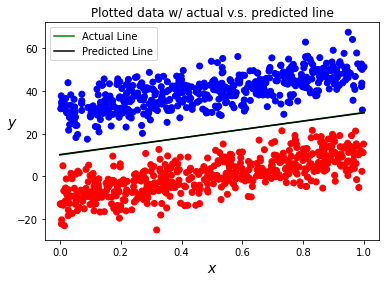

In [0]:
pred = network.predict(tdata)
weights, bias = network.get_weights()

# Plot actual data
pltclrs = ["red" if val == 1 else "blue" for val in tlabel]
#pltlbls = ["Label = 1" if val == 1 else "Label = 0" for val in tlabel]
plt.scatter(tdatax, tdatay, c = pltclrs)

# Plot actual reg. line
truew, trueb = get_w_and_b()
truex, truey = [0, 1], [trueb, truew + trueb]
plt.plot(truex, truey, "green", label = "Actual Line")

# Plot predicted reg. line
print(weights, bias)
predx = [0, 1]
predy = (-bias/weights[1]) + (-weights[0]/weights[1]) * predx
plt.plot(predx, predy, "black", label = "Predicted Line")
plt.title("Plotted data w/ actual v.s. predicted line")
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", rotation = 0, fontsize = 14)
plt.legend()
plt.show()

<h2>...And printing out the heatmap.</h2>

Locator attempting to generate 5001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


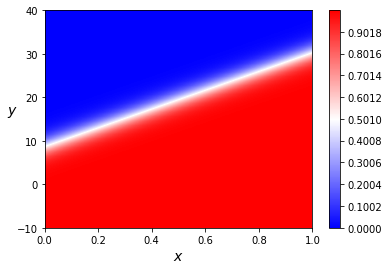

In [0]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(np.negative(z)))

# build heatmap
xln, yln = np.meshgrid(np.linspace(0,1), np.linspace(-10, 40))
z = weights[0] * xln + weights[1] * yln + bias
plt.contourf(xln, yln, sigmoid(z), m, cmap = "bwr")
plt.colorbar()
plt.xlabel("$x$", fontsize = 14)
plt.ylabel("$y$", rotation = 0, fontsize = 14)
plt.show()

<h2> Sources used: </h2>

https://colab.research.google.com/drive/1pOFL4Qm6WOn2Nxxy6_HteEqQMxStTwzs?authuser=1
https://keras.io/layers/core/
https://github.com/schneider128k/machine_learning_course/blob/master/keras_basics.md
https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf